<a href="https://colab.research.google.com/github/gchn24/DS-Notes/blob/main/02_Linear_Regression_1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
!gdown 1V9ZFTiRKzJ8dbdD1JI5nRM1_TEVTRjGS -O 'weight-height.csv'
!gdown 1qI00dHCDmHq2AR7yinZKbv1Ttir6aE8j -O 'cars24-car-price-clean.csv'

Downloading...
From: https://drive.google.com/uc?id=1V9ZFTiRKzJ8dbdD1JI5nRM1_TEVTRjGS
To: /content/weight-height.csv
100% 428k/428k [00:00<00:00, 4.87MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qI00dHCDmHq2AR7yinZKbv1Ttir6aE8j
To: /content/cars24-car-price-clean.csv
100% 1.71M/1.71M [00:00<00:00, 12.6MB/s]


In [20]:
df=pd.read_csv("cars24-car-price-clean.csv")
df

,selling_price,year,km_driven,mileage,engine,max_power,make,model,transmission_type,seats_coupe,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_petrol,seller_dealer,seller_individual,seller_trustmark dealer
0,1.20,2012.0,120000,19.70,796.0,46.30,Maruti,Alto Std,1,0,1,0,0,0,0,0,1,0,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,Hyundai,Grand i10 Asta,1,0,1,0,0,0,0,0,1,0,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,Hyundai,i20 Asta,1,0,1,0,0,0,0,0,1,0,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,Maruti,Alto K10 2010-2014 VXI,1,0,1,0,0,0,0,0,1,0,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV,1,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,6.50,2017.0,69480,23.59,1364.0,67.05,Toyota,Platinum Etios 1.4 GXD,1,0,1,0,0,1,0,0,0,1,0,0
19816,9.25,2019.0,18000,17.50,1373.0,91.10,Maruti,Ertiga BSIV VXI,1,0,1,0,0,0,0,0,1,1,0,0
19817,4.25,2015.0,67000,21.14,1498.0,103.52,Skoda,Rapid 1.5 TDI Elegance,1,0,1,0,0,1,0,0,0,1,0,0
19818,12.25,2016.0,3800000,16.00,2179.0,140.00,Mahindra,XUV500 W6 2WD,1,0,1,0,0,1,0,0,0,1,0,0


In [21]:
df.groupby(["make"])["selling_price"].mean()

make
Ambassador         1.452500
Audi              20.795525
BMW               26.547723
Bentley          128.250000
Chevrolet          2.723621
DC                11.925000
Daewoo             0.780000
Datsun             3.205176
Ferrari          395.000000
Fiat               3.152795
Force              5.520000
Ford               6.277078
Honda              5.993159
Hyundai            5.460699
ISUZU             18.975000
Isuzu             13.260000
Jaguar            32.888000
Jeep              17.958049
Kia               17.129697
Lamborghini      150.000000
Land              38.239020
Lexus             51.465000
MG                17.529474
Mahindra           7.327798
Maruti             4.684721
Maserati          61.000000
Mercedes-AMG      51.000000
Mercedes-Benz     25.235361
Mini              23.304348
Mitsubishi         8.631026
Nissan             4.743702
Opel               1.500000
OpelCorsa          1.516667
Porsche           53.153600
Premier            2.550000
Renault        

In [22]:
df["make"]=df.groupby(["make"])["selling_price"].transform("mean")
df["model"]=df.groupby(["model"])["selling_price"].transform("mean")

In [23]:
df

,selling_price,year,km_driven,mileage,engine,max_power,make,model,transmission_type,seats_coupe,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_petrol,seller_dealer,seller_individual,seller_trustmark dealer
0,1.20,2012.0,120000,19.70,796.0,46.30,4.684721,1.220000,1,0,1,0,0,0,0,0,1,0,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,5.460699,4.818750,1,0,1,0,0,0,0,0,1,0,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,5.460699,3.394000,1,0,1,0,0,0,0,0,1,0,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,4.684721,2.242676,1,0,1,0,0,0,0,0,1,0,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,6.277078,6.777576,1,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,6.50,2017.0,69480,23.59,1364.0,67.05,11.186526,7.075000,1,0,1,0,0,1,0,0,0,1,0,0
19816,9.25,2019.0,18000,17.50,1373.0,91.10,4.684721,7.128571,1,0,1,0,0,0,0,0,1,1,0,0
19817,4.25,2015.0,67000,21.14,1498.0,103.52,7.541090,4.454000,1,0,1,0,0,1,0,0,0,1,0,0
19818,12.25,2016.0,3800000,16.00,2179.0,140.00,7.327798,8.096522,1,0,1,0,0,1,0,0,0,1,0,0


In [24]:
X=df[['year', 'km_driven', 'mileage', 'engine', 'max_power',
       'make', 'model', 'transmission_type', 'seats_coupe', 'seats_family',
       'seats_large', 'fuel_cng', 'fuel_diesel', 'fuel_electric', 'fuel_lpg',
       'fuel_petrol', 'seller_dealer', 'seller_individual',
       'seller_trustmark dealer']]
y= df["selling_price"]

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
df1=pd.DataFrame(MinMaxScaler().fit_transform(X))

In [27]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.689655,0.031553,0.135345,0.117891,0.066506,0.009905,0.002268,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.827586,0.005237,0.128448,0.177281,0.123994,0.011873,0.011386,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.620690,0.015764,0.112069,0.177281,0.120773,0.011873,0.007776,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.689655,0.009711,0.145862,0.147808,0.100000,0.009905,0.004859,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.793103,0.007869,0.161810,0.221860,0.150709,0.013944,0.016349,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.862069,0.018258,0.168879,0.202014,0.099919,0.026398,0.017103,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
19816,0.931034,0.004711,0.116379,0.203347,0.138647,0.009905,0.017238,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
19817,0.793103,0.017606,0.147759,0.221860,0.158647,0.017151,0.010462,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
19818,0.827586,1.000000,0.103448,0.322719,0.217391,0.016610,0.019691,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test= train_test_split(df1,y,test_size=0.2,random_state=10)

In [30]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
19738,0.827586,0.023659,0.077500,0.369372,0.153945,0.026398,0.020533,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
17034,0.862069,0.016528,0.210345,0.184834,0.111111,0.009905,0.012677,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
17080,0.793103,0.020597,0.144569,0.184834,0.134879,0.009905,0.015147,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7420,0.827586,0.005237,0.143276,0.177429,0.099839,0.006152,0.006355,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15375,0.862069,0.019448,0.110345,0.221712,0.179227,0.013224,0.015237,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,0.620690,0.047343,0.112069,0.221712,0.181965,0.013224,0.011006,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7291,0.896552,0.009882,0.153362,0.147808,0.099919,0.009905,0.007613,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
17728,0.896552,0.009974,0.159828,0.206754,0.134879,0.011873,0.021727,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7293,0.758621,0.018428,0.130172,0.177281,0.130113,0.009905,0.010847,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [31]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
3386,0.620690,0.015764,0.094828,0.234893,0.160515,0.009905,0.004366,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
11664,0.896552,0.007111,0.171034,0.177577,0.127214,0.009135,0.009683,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7327,0.931034,0.012606,0.095172,0.408027,0.272947,0.026398,0.078537,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
17993,0.862069,0.006816,0.102586,0.221564,0.186296,0.013944,0.018990,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
19419,0.793103,0.015754,0.120690,0.177429,0.131562,0.013224,0.009033,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,0.827586,0.025764,0.150000,0.177281,0.125765,0.009905,0.015696,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3172,0.551724,0.020565,0.104310,0.117891,0.051530,0.009905,0.001427,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
18409,0.896552,0.004974,0.152759,0.221860,0.166828,0.017151,0.019320,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4699,0.793103,0.016027,0.145517,0.177133,0.091304,0.009905,0.006904,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
y_train

19738    9.45
17034    7.00
17080    7.85
7420     3.50
15375    8.50
         ... 
9372     4.00
7291     4.70
17728    8.75
7293     4.45
17673    7.75
Name: selling_price, Length: 15856, dtype: float64

In [33]:
y_test

3386      2.60
11664     4.60
7327     33.00
17993     7.25
19419     3.89
         ...  
5241      5.75
3172      0.50
18409     9.60
4699      3.90
1033      6.50
Name: selling_price, Length: 3964, dtype: float64

In [34]:
df=pd.read_csv("weight-height.csv")
df.drop(columns="Gender",inplace=True)

In [35]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


<Axes: xlabel='Height', ylabel='Weight'>

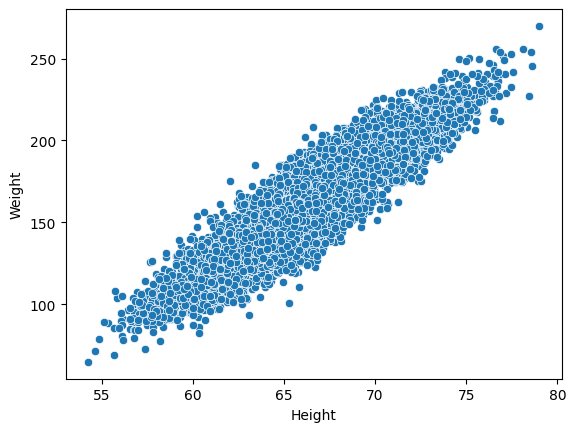

In [36]:
sns.scatterplot(x=df["Height"],y=df["Weight"])

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [38]:
df_minmax=MinMaxScaler().fit_transform(df)
df_minmax

array([[0.79172838, 0.863139  ],
       [0.58695829, 0.4754764 ],
       [0.8023644 , 0.72113127],
       ...,
       [0.38830089, 0.31065968],
       [0.59715974, 0.48298768],
       [0.31052854, 0.23843869]])

<Axes: >

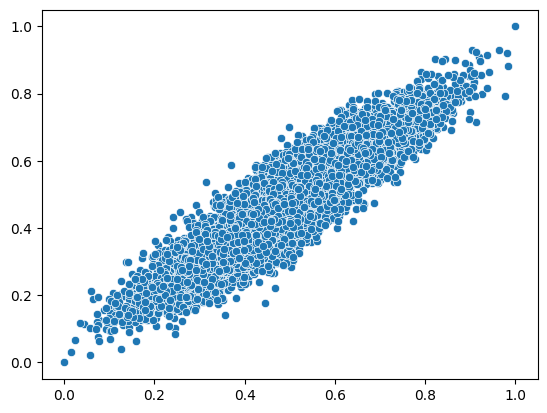

In [39]:
sns.scatterplot(x=df_minmax[:,0],y=df_minmax[:,1])

In [40]:
df_standard=StandardScaler().fit_transform(df)
df_standard

array([[ 1.94406149,  2.50579697],
       [ 0.62753668,  0.02710064],
       [ 2.01244346,  1.59780623],
       ...,
       [-0.64968792, -1.02672965],
       [ 0.69312469,  0.07512745],
       [-1.14970831, -1.48850724]])

<Axes: >

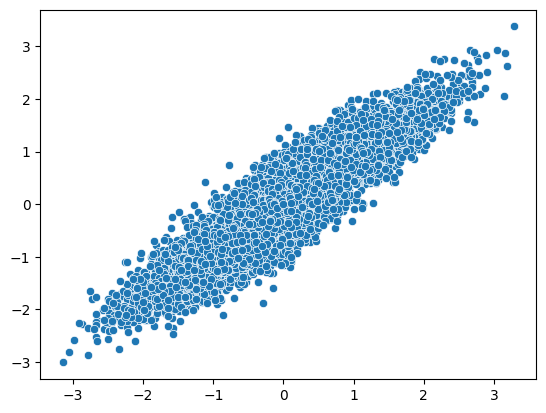

In [41]:
sns.scatterplot(x=df_standard[:,0],y=df_standard[:,1])